In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [49]:
cars = pd.read_csv(r"C:\Users\Yashaswi\Desktop\Jink\Linear Regression\car_data.csv")

In [50]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
cars.shape

(301, 9)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

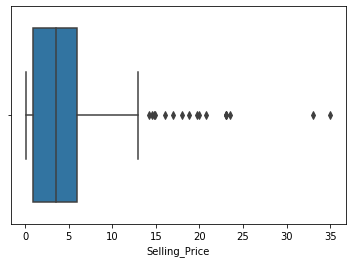

In [53]:
sns.boxplot(cars.Selling_Price)
plt.show()

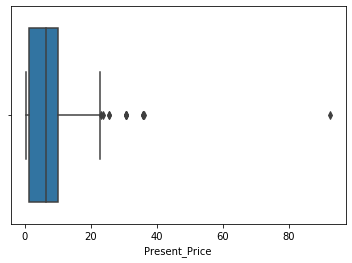

In [54]:
sns.boxplot(cars.Present_Price)
plt.show()

In [55]:
cars.Present_Price.describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

In [56]:
cars[cars.Present_Price >80]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


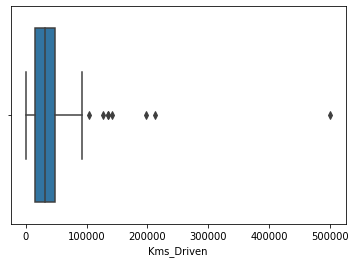

In [57]:
sns.boxplot(cars.Kms_Driven)
plt.show()

In [58]:
cars[cars.Kms_Driven >400000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [59]:
cars["km_group"] = pd.cut(cars.Kms_Driven,[0,10000, 30000, 50000, 70000, 500000],labels = ["0-10k", "10-30k","30-50k","50-70k",">70k"])

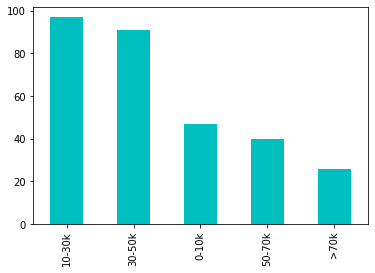

In [60]:
cars.km_group.value_counts().plot(kind= "bar",color = 'c')

In [61]:
cars.Seller_Type.value_counts(normalize =True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

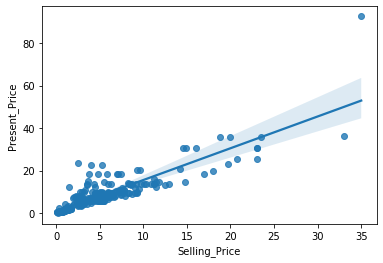

In [62]:
sns.regplot(cars.Selling_Price, cars.Present_Price)

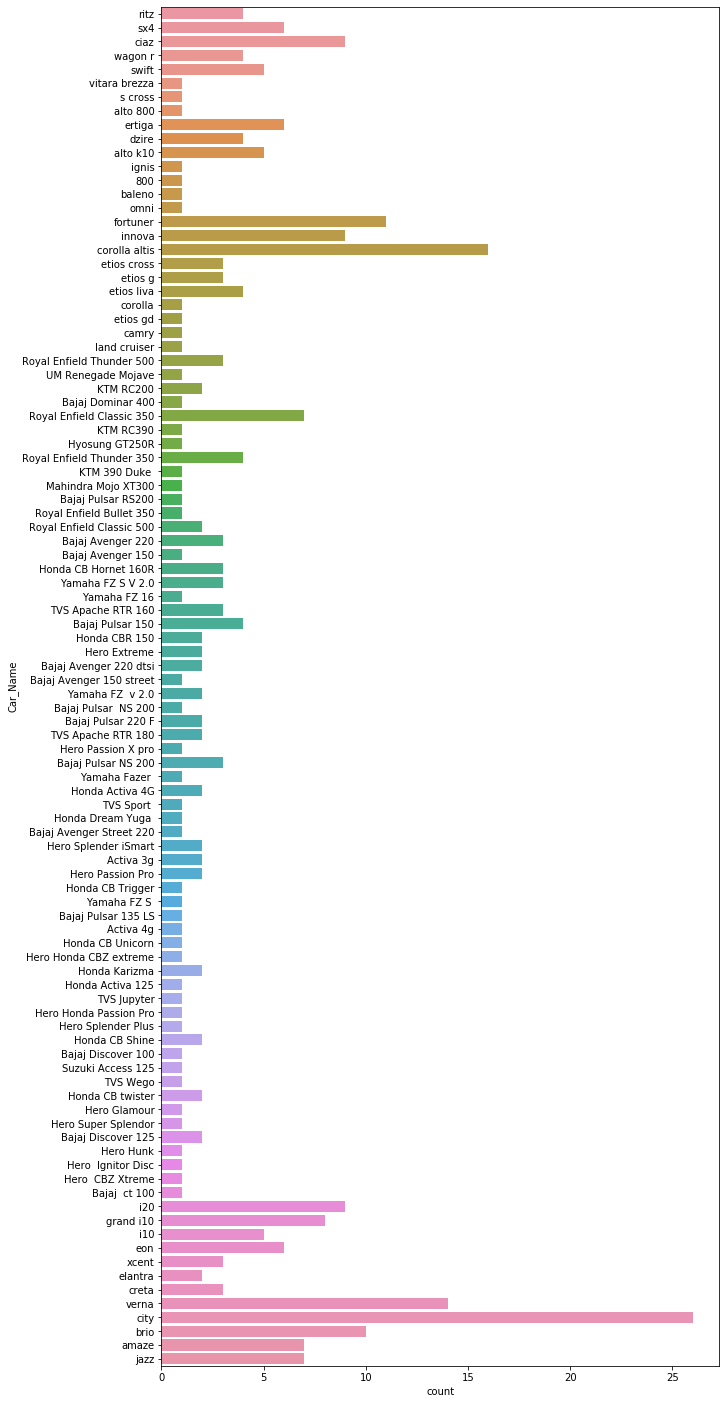

In [63]:
plt.figure(figsize =(10,25))
sns.countplot(y = cars.Car_Name)

In [64]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,km_group
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10-30k
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,30-50k
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0-10k
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0-10k
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,30-50k


In [65]:
cars_automatic = cars[cars.Transmission == 'Automatic']
cars_manual = cars[cars.Transmission == 'Manual']

In [66]:
cars_automatic.shape

(40, 10)

In [67]:
cars_manual.shape

(261, 10)

In [68]:
cars['Difference'] = cars["Present_Price"] - cars["Selling_Price"]

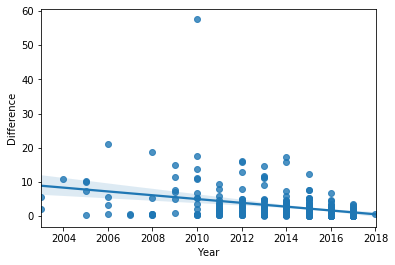

In [69]:
sns.regplot( cars['Year'], cars['Difference'])

In [70]:
cars['Age'] = 2020- cars.Year

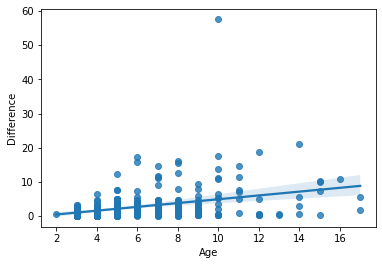

In [71]:
sns.regplot( cars['Age'], cars['Difference'])

In [72]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,km_group,Difference,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10-30k,2.24,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,30-50k,4.79,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0-10k,2.60,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0-10k,1.30,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,30-50k,2.27,6


In [109]:
cars_city = cars[cars.Car_Name =='city']

In [110]:
cars_city.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,km_group,Difference,Age
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,50-70k,4.90,7
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,30-50k,2.70,6
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,50-70k,4.65,7
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,30-50k,3.35,4
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,30-50k,5.10,5


In [111]:
X = cars_city['Age']
y = cars_city['Selling_Price']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [113]:
X_train.head()

260    4
275    4
257    5
299    3
251    7
Name: Age, dtype: int64

In [114]:
import statsmodels.api as sm

In [115]:
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [116]:
lr.params

const    12.751537
Age      -0.863433
dtype: float64

In [117]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     85.90
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           7.82e-08
Time:                        18:44:55   Log-Likelihood:                -26.961
No. Observations:                  18   AIC:                             57.92
Df Residuals:                      16   BIC:                             59.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7515      0.630     20.231      0.0

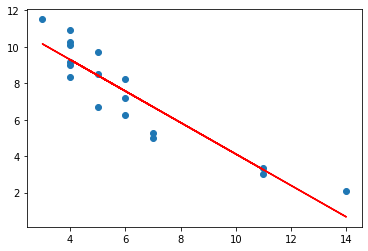

In [128]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 12.7515 -0.8634*X_train, 'r')
plt.show()

In [129]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

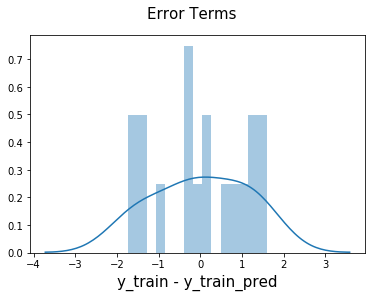

In [120]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

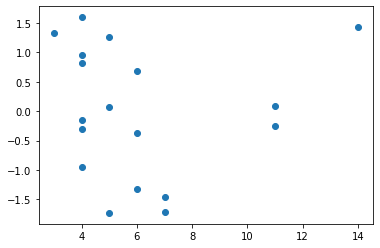

In [121]:
plt.scatter(X_train,res)
plt.show()

In [122]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [123]:
y_pred.head()

270    4.980637
295    8.434370
276    8.434370
272    8.434370
258    8.434370
dtype: float64

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5594331542752397

In [126]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9329249321873299

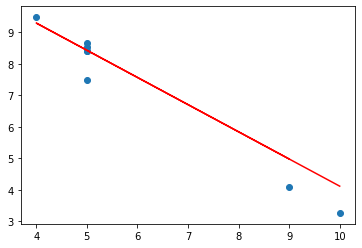

In [130]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 12.7515 -0.8634 * X_test, 'r')
plt.show()